In [19]:
%matplotlib inline
from ecell4 import *

In [20]:
from scipy.optimize import curve_fit
import scipy
import numpy as np
import math
import matplotlib.pylab as plt
from scipy import special
from scipy import integrate

In [26]:
def expfunc(k, N):
    def func(x):
        return N * np.exp(-k * x)
    return func

pi = math.pi


In [186]:
def surp(x,vr,D):
    gamma = 0.5772156649
    #f = lambda x: k / (1 + k / 4 * np.pi * (D + D) / (np.log(4 * (D + D) * x / (voxel_radius * voxel_radius)) - 2 * gamma))
    f = lambda x: 4.*np.pi*D*2*((1./(math.log(4*D*2*x/(4*vr * vr))-(2*gamma)))-
                                (gamma/((math.log(4*D*2*x/(4*vr * vr))-(2*gamma))**2)))
    y = [np.exp(-scipy.integrate.quad(f, 0, xi)[0]) for xi in x]   
    return y

def surp2(x,Rt,Dt,ka):
    func = lambda u,t: (math.exp(-Dt*u*u*t)-1)/u/(
        ((ka*special.jv(0,Rt*u)+(2*pi*Rt*u*Dt*special.jv(1,Rt*u)))**2)+
     ((ka*special.yn(0,Rt*u)+(2*pi*Rt*u*Dt*special.yn(1,Rt*u)))**2))
    ktes = []
    for tt in x:
        y,err = integrate.quad(func,0,np.inf,args=tt)
        ktes.append(y*8*ka*ka*Dt/pi + ka)
    #plt.plot(x,ktes)
    #plt.xscale('log')
    SP = [np.exp(-np.trapz(ktes[0:i],x[0:i])) for i in range(len(ktes))][1:]
    return SP

def test(D,voxel_radius,ka):
    tm = (2*voxel_radius*voxel_radius)/4./D
    print 'tm',tm
    x = np.linspace(1000*tm, 10, 1001)
    #x = np.logspace(-4, 0, 101)
    #x = np.linspace(1e-2,5,1000)
    y = surp(x,voxel_radius,D)
    #y = surp2(x,voxel_radius,D,ka)
    #x = x[0:-1]
    tlen = int(len(x)/2)
    p, covar = curve_fit(lambda x, *args: expfunc(args[0], 1.0)(x), x[tlen:], y[tlen:], p0=[1.0])
    plt.plot(x,y,'.')
    hl = np.array(x)[(np.array(y)<(1./math.e))][0]
    print 'halflife',hl,1./hl
    #plt.xscale('log')
    plt.yscale('log')
    plt.ylabel('survival prob')
    plt.plot(x,expfunc(p[0], 1.0)(x))
    print D,voxel_radius,p[0],covar[0]
    return p[0]


0.251327412287
tm 1.25e-05


/home/chew/.local/lib/python2.7/site-packages/ipykernel/__main__.py:6: RuntimeWarning: overflow encountered in exp


halflife 0.3420875 2.92322870611
1.0 0.005 2.22483166656 [  1.71848211e-07]


2.2248316665563013

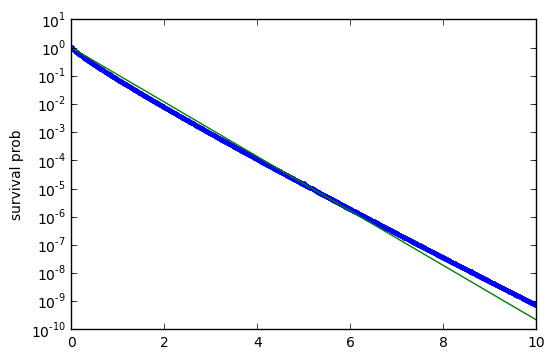

In [188]:
#test(0.1,10,0.005)#activation lim
D = 1.
rv = 0.005
ka = 1000.
print 4*math.pi*D*4*rv
test(D,rv,ka)#diffusion lim

In [123]:
def test(k,D,voxel_radius):
    gamma = 0.5772156649
    f = lambda x: k / (1 + k / 4 * np.pi * (D + D) / (np.log(4 * (D + D) * x / (voxel_radius * voxel_radius)) - 2 * gamma))
    #f = lambda x: 4.*np.pi*D*2*((1./(math.log(4*D*2*x/(4*voxel_radius * voxel_radius))-(2*gamma)))-
                                #(gamma/((math.log(4*D*2*x/(4*voxel_radius * voxel_radius))-(2*gamma))**2)))
    x = np.linspace(1e-2, 2, 101)
    y = [np.exp(-scipy.integrate.quad(f, 0, xi)[0]) for xi in x]
    p, covar = curve_fit(lambda x, *args: expfunc(args[0], 1.0)(x), x[-20:], y[-20:], p0=[1.0])
    plt.plot(x,y,'y.')
    #plt.xscale('log')
    plt.yscale('log')
    #plt.ylabel('survival prob')
    plt.plot(x,expfunc(p[0], 1.0)(x),'k-')
    print D,voxel_radius,k,p[0],covar[0]
    return p[0]
keff = lambda x,c: x / (1.0 + c * x)
ks = np.logspace(-2, +3, 11)
def fitk(D,vr):
    kef = [test(xi,D,vr) for xi in ks]
    #p, covar = curve_fit(keff, ks, kef)
    #print p,covar
    #plt.loglog(ks, keff(ks,p[0]), '-')
    plt.loglog(ks,kef,'o',label='D{:.1f},rv{:.3f}'.format(D,vr))
    plt.xlabel('ka')
    plt.ylabel('keff')
    #plt.legend(loc='best',fontsize=8)
    return kef#,1./p[0]

1.0 0.005 1000.0 6.98096881626 [  3.24387123e-05]


6.9809688162606909

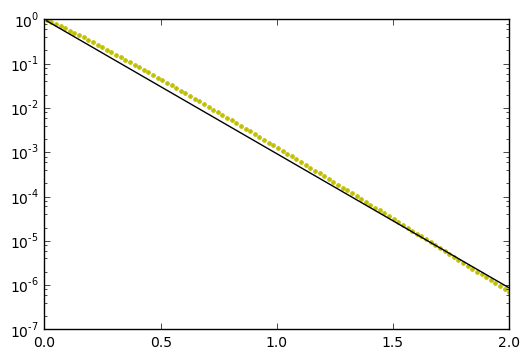

In [7]:
test(1e3,D,rv)

1.0 0.005 0.01 0.0099857435341 [  3.65791507e-16]
1.0 0.005 0.0316227766017 0.0314806625582 [  3.65345670e-14]
1.0 0.005 0.1 0.098592638973 [  3.44076004e-12]
1.0 0.005 0.316227766017 0.302571097953 [  3.05977189e-10]
1.0 0.005 1.0 0.87514686383 [  2.13456688e-08]
1.0 0.005 3.16227766017 2.17955952505 [  7.55884279e-07]
1.0 0.005 10.0 4.12426643474 [  7.28750661e-06]
1.0 0.005 31.6227766017 5.74797520693 [  1.96710135e-05]
1.0 0.005 100.0 6.56670945335 [  2.78951755e-05]
1.0 0.005 316.227766017 6.87671722291 [  3.12738318e-05]
1.0 0.005 1000.0 6.98096881626 [  3.24387123e-05]


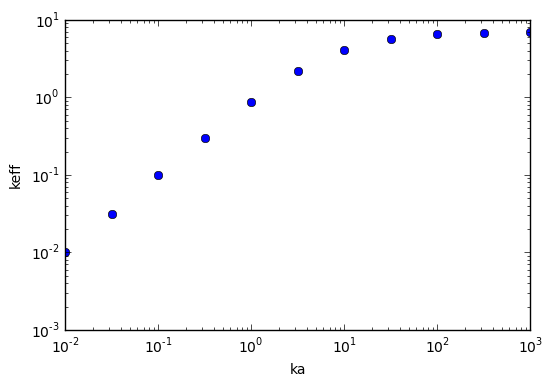

In [66]:
kef = fitk(1.,0.005)

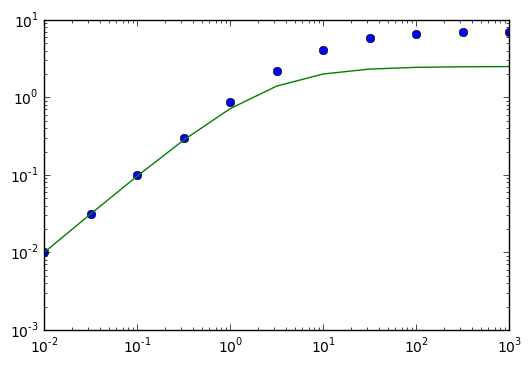

In [141]:
plt.loglog(ks,kef,'o')
plt.loglog(ks,[k/(1+(k/2.5)) for k in ks])

/home/chew/.local/lib/python2.7/site-packages/ipykernel/__main__.py:3: RuntimeWarning: divide by zero encountered in log
  app.launch_new_instance()


0.001 0.005 0.1 0.0999956656526 [  2.13278040e-15]
0.001 0.005 0.316227766017 0.316183376019 [  3.05507646e-13]
0.001 0.005 1.0 0.999508351041 [  7.42246774e-11]
0.001 0.005 3.16227766017 3.15617277043 [  2.28795978e-08]
0.001 0.005 10.0 9.92671745282 [  1.98595745e-06]
0.001 0.005 31.6227766017 30.7348510144 [ 0.00020263]
0.001 0.005 100.0 73.2667218815 [ 0.12343595]
0.001 0.005 316.227766017 222.084526025 [ 0.00558091]
0.001 0.005 1000.0 307.988225164 [ 0.00111433]
0.001 0.005 3162.27766017 577.994005201 [ 0.00050677]
0.001 0.005 10000.0 733.421039965 [  2.22840023e-07]
[ 0.00137285] [[  4.40022455e-09]]
0.0016681005372 0.005 0.1 0.0999936788873 [  3.38339286e-15]
0.0016681005372 0.005 0.316227766017 0.316162834636 [  3.92835036e-13]
0.0016681005372 0.005 1.0 0.999299895048 [  7.21123731e-11]
0.0016681005372 0.005 3.16227766017 3.15343785169 [  1.88748716e-08]
0.0016681005372 0.005 10.0 9.87784450692 [  2.09800007e-06]
0.0016681005372 0.005 31.6227766017 30.4316822103 [ 0.00047246]
0

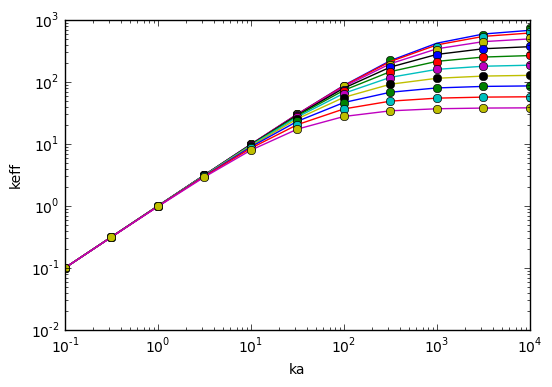

In [346]:
#Dcs = np.logspace(-2,1,30)
Dcs = np.logspace(-3,-1,10)
kdss=[]
for Dc in Dcs:
    kef,kds = fitk(Dc,0.005)
    kdss.append(kds)


[ 20.98676803   0.52559552] [[  2.86265789e+01  -2.15290731e-01]
 [ -2.15290731e-01   1.65106964e-03]]


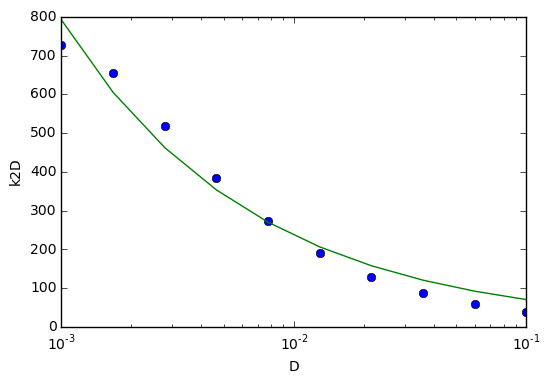

In [357]:
linf = lambda x,m: m*x
def fitfunc(x,N,k):
    return [N/(xx**k) for xx in x] 
qsa = lambda x: (8*math.pi*x)/math.log(1./(32*math.pi*voxel_radius*voxel_radius))
p, covar = curve_fit(fitfunc, Dcs, kdss,bounds=(0,np.inf))
print p,covar
#plt.plot(Dcs,[1./k for k in kdss],'o')
plt.plot(Dcs,kdss,'o')
plt.plot(Dcs,fitfunc(Dcs,p[0],p[1]),'-')
#plt.plot(Dcs,po(Dcs,p[0]),'-')
#plt.plot(Dcs,qsa(Dcs),'-')
plt.xlabel('D')
plt.ylabel('k2D')
plt.xscale('log')
#plt.yscale('log')

In [364]:
D = 0.01
ka = [1]
kd = fitfunc([D],p[0],p[1])[0]
print kd
ff = lambda x: x/(1+(x/kd))
[ff(k)*(240./9) for k in ka]


236.122082647


[0.99578276308626756]

/home/chew/.local/lib/python2.7/site-packages/ipykernel/__main__.py:3: RuntimeWarning: divide by zero encountered in log
  app.launch_new_instance()


0.01 0.0045 0.1 0.0999746063267 [  1.59289623e-14]
0.01 0.0045 0.316227766017 0.315972628216 [  2.99737056e-12]
0.01 0.0045 1.0 0.997303789231 [  4.16678542e-10]
0.01 0.0045 3.16227766017 3.13040758271 [  8.99868932e-08]
0.01 0.0045 10.0 9.62875516995 [  5.83830124e-06]
0.01 0.0045 31.6227766017 27.8031111746 [ 0.00037402]
0.01 0.0045 100.0 68.6748925412 [ 0.00581927]
0.01 0.0045 316.227766017 134.347630401 [ 0.00138229]
0.01 0.0045 1000.0 193.496818458 [ 0.00139588]
0.01 0.0045 3162.27766017 225.061428342 [ 0.00113166]
0.01 0.0045 10000.0 237.358160661 [ 0.00102102]
[ 0.00413758] [[  1.97592295e-10]]
0.01 0.00511111111111 0.1 0.0999735178394 [  1.96856012e-14]
0.01 0.00511111111111 0.316227766017 0.31595960717 [  2.76629094e-12]
0.01 0.00511111111111 1.0 0.99717864227 [  5.09144749e-10]
0.01 0.00511111111111 3.16227766017 3.12835247576 [  1.36717471e-07]
0.01 0.00511111111111 10.0 9.60956442179 [  7.65030134e-06]
0.01 0.00511111111111 31.6227766017 27.5889118356 [ 0.00075908]
0.01 0.0

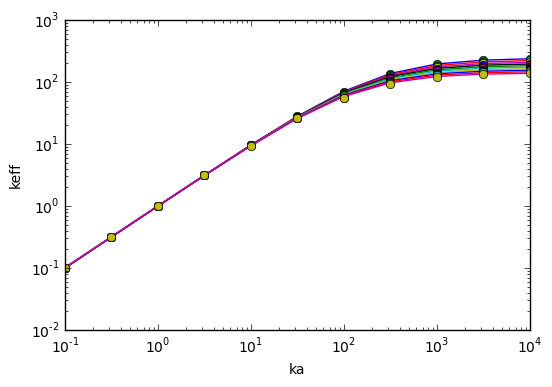

In [341]:
vrs = np.linspace(0.0045,0.01,10)
kdss2=[]
for vr in vrs:
    kef,kds = fitk(0.01,vr)
    kdss2.append(kds)

[ 146.25786557  354.49777561   57.75194419] [[ 15.44440749   0.34143958  13.21111401]
 [  0.34143958   1.12239963  -0.10688559]
 [ 13.21111401  -0.10688559  11.45280445]]


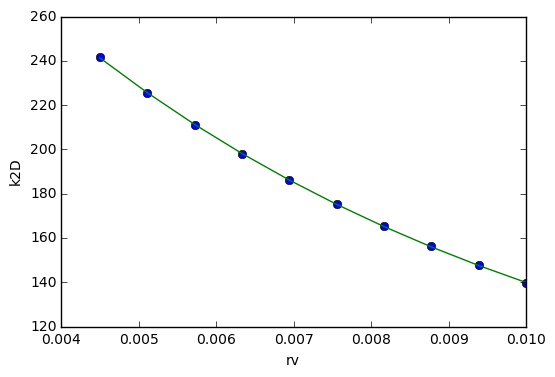

In [366]:
def expf(x,k,N,C):
    return [N*math.exp(-xx*k)+C for xx in x]

p, covar = curve_fit(expf, vrs, kdss2)
print p,covar
plt.plot(vrs,kdss2,'o')
plt.plot(vrs,expf(vrs,p[0],p[1],p[2]),'-')
plt.xlabel('rv')
plt.ylabel('k2D')
#plt.xscale('log')
#plt.yscale('log')


In [367]:
rv = 0.005
ka =1.
kd = expf([rv],p[0],p[1],p[2])[0]
print kd
ff = lambda x: x/(1+(x/kd))
print 'keff=',ff(ka)*(240./9)



228.367487975
keff= 0.995640184192
